In [8]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#read dataset
data=pd.read_csv('hour.csv')

In [10]:
#shape,null,summery
data.shape

(17379, 17)

In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
#sanity chck
#Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped.
#Month values should be 1-12 only
#Hour values should be 0-23
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
data['registered']+data['casual']!=data['cnt']

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

In [11]:
#drop rows where this is true
data.drop(data[data['registered']+data['casual']!=data['cnt']].index,inplace=True)

In [12]:
#Month values should be 1-12 only
data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [13]:
#Hour values should be 0-23
data['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. ‘Instant’ is the index and needs to be dropped too. The date column dteday will not be used in the model building, and therefore needs to be dropped. Create a new dataframe named inp1.

In [12]:
 #dropping col(not rows) so axis=1 
a = ['casual','registered','dteday','instant']
inp1 = data.drop(a, axis=1).copy()

In [19]:
inp1.shape

(17379, 13)

In [20]:
#univariate analysis
#Describe the numerical fields in the dataset using pandas describe method.
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:xlabel='temp', ylabel='Density'>

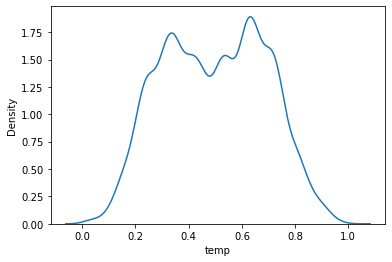

In [21]:
#Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.
sns.kdeplot(data['temp'])

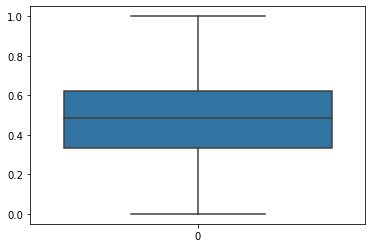

In [21]:
#Boxplot for atemp ....Are there any outliers?
sns.boxplot(data=inp1.atemp)
plt.show()
import warnings
warnings.filterwarnings('ignore')

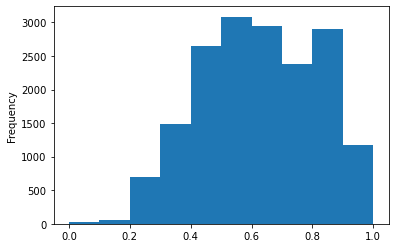

In [26]:
#Histogram for hum...Do you detect any abnormally high values?
inp1.hum.plot.hist()
plt.show()

<AxesSubplot:xlabel='hum', ylabel='Count'>

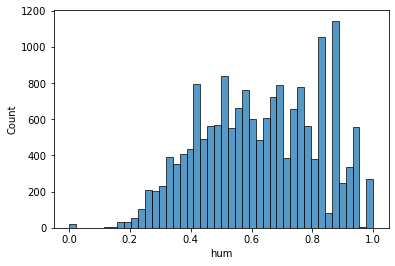

In [27]:
sns.histplot(data=inp1.hum)

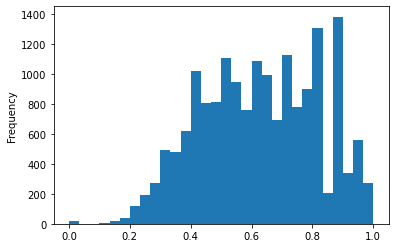

In [28]:
inp1.hum.plot.hist(bins=30)
plt.show()

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

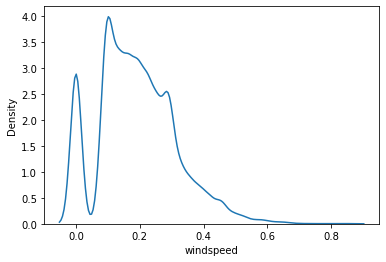

In [29]:
#Density plot for windspeed
sns.kdeplot(data['windspeed'])

<AxesSubplot:>

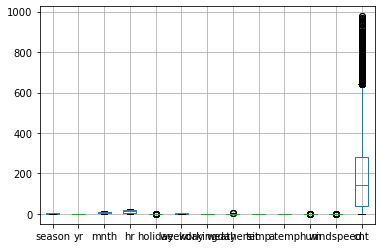

In [30]:
#Box and density plot for cnt – this is the variable of interest 
#Do you see any outliers in the boxplot? 
#Does the density plot provide a similar insight?
inp1.boxplot()

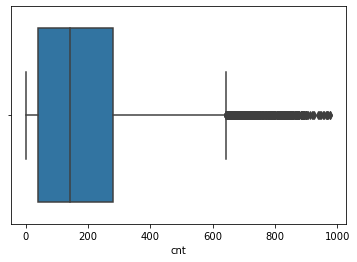

In [31]:
sns.boxplot(inp1.cnt)
plt.show()

<AxesSubplot:ylabel='Density'>

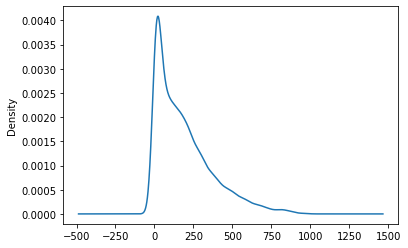

In [32]:
inp1.cnt.plot.density()

In [1]:
#Outlier treatment
#Cnt looks like some hours have rather high values. You’ll need to treat these outliers so that they don’t skew the analysis
#and the model. 
#Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99
#Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2.
#1.5 IQR rule
#business-95%

In [13]:
inp1.cnt.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [19]:
inp2=inp1[inp1.cnt<563].copy()

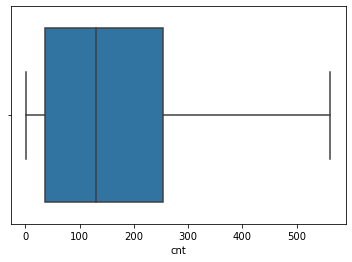

In [22]:
sns.boxplot(inp2.cnt)
plt.show()

<AxesSubplot:xlabel='hr', ylabel='cnt'>

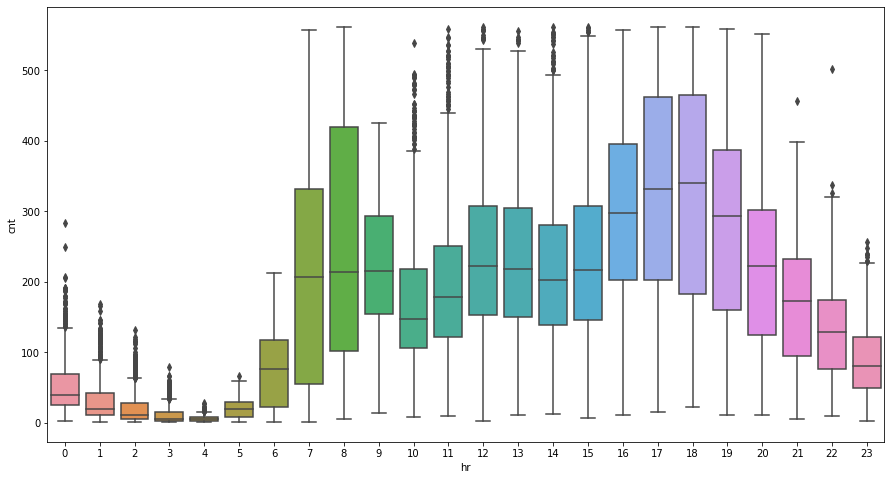

In [25]:
#Bivariate analysis
#Make boxplot for cnt vs. hour...What kind of pattern do you see?
plt.figure(figsize=[15,8])
sns.boxplot('hr','cnt',data=inp2)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

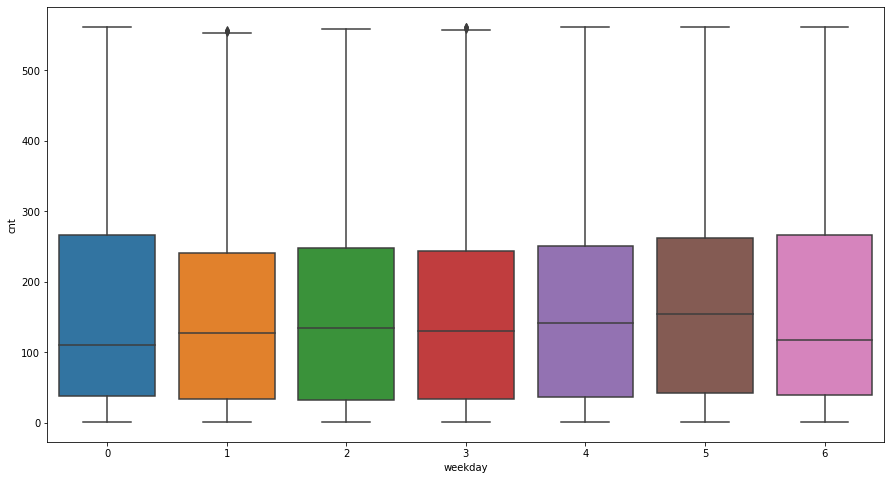

In [26]:
#Make boxplot for cnt vs. weekday
plt.figure(figsize=[15,8])
sns.boxplot('weekday','cnt',data=inp2)

In [27]:
#Make boxplot for cnt vs. month
#Make boxplot for cnt vs. season

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

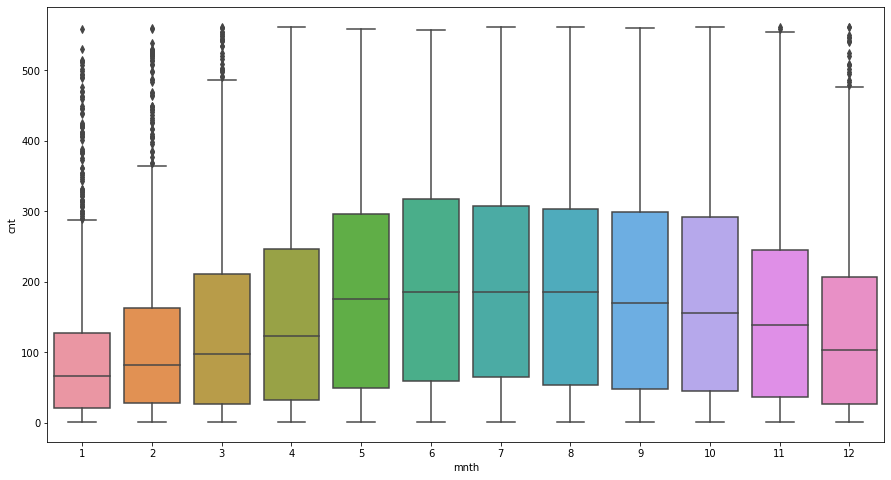

In [30]:
plt.figure(figsize=[15,8])
sns.boxplot('mnth','cnt',data=inp2)

<AxesSubplot:xlabel='season', ylabel='cnt'>

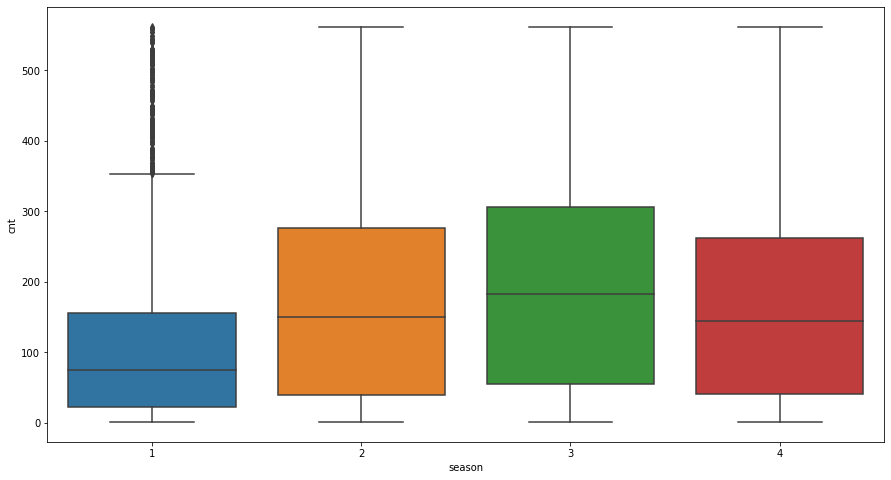

In [31]:
plt.figure(figsize=[15,8])
sns.boxplot('season','cnt',data=inp2)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

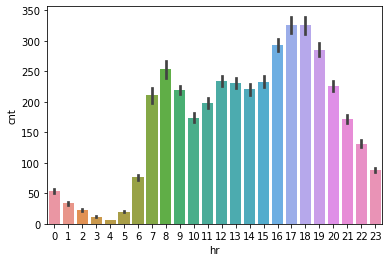

In [32]:
#Make a bar plot with the median value of cnt for each hr..Does this paint a different picture from the box plot?
sns.barplot(x='hr',y='cnt',data=inp2)

In [33]:
#Make a correlation matrix for variables atemp, temp, hum, and windspeed
#Which variables have the highest correlation?
a=['atemp','temp','hum','windspeed']
corrs=inp2[a].corr()
corrs

,atemp,temp,hum,windspeed
atemp,1.000000,0.988218,-0.025747,-0.073985
temp,0.988218,1.000000,-0.042603,-0.033209
hum,-0.025747,-0.042603,1.000000,-0.288648
windspeed,-0.073985,-0.033209,-0.288648,1.000000


<AxesSubplot:>

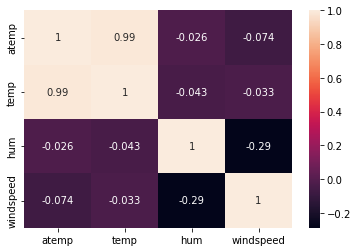

In [34]:
#darker color are showing less correlation, light are showing more correlation
sns.heatmap(corrs,annot=True)

In [35]:
#Data preprocessing
inp2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [36]:
inp3=inp2.copy()

In [37]:
#For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.
inp3.mnth[inp3.mnth.isin([5,6,7,8,9])]=5

In [38]:
inp3['mnth'].value_counts()

5     6785
12    1455
1     1429
3     1412
11    1392
4     1349
10    1341
2     1339
Name: mnth, dtype: int64

In [39]:
inp2['mnth'].value_counts()

12    1455
1     1429
3     1412
7     1401
5     1399
11    1392
8     1365
4     1349
10    1341
2     1339
6     1324
9     1296
Name: mnth, dtype: int64

In [40]:
#Get dummies for the updated 6 mnth values

In [43]:
#Treating hr column
#Create new mapping: 0-5: 0, 11-15: 11; other values are untouched. 
#Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.
inp3.hr[inp3.hr.isin([0,1,2,3,4,5])]=0
inp3.hr[inp3.hr.isin([11,12,13,14,15])]=11

In [44]:
inp3['hr'].value_counts()

0     4276
11    3482
22     728
23     728
9      727
10     727
20     727
21     727
6      725
7      724
16     689
19     671
8      547
18     546
17     478
Name: hr, dtype: int64

In [45]:
#Get dummy columns for season, weathersit, weekday, mnth, and hr. 
#You needn’t club these further as the levels seem to have different values for the median cnt, when seen from the box plots.
list=['season','weathersit','weekday','mnth','hr']
inp3=pd.get_dummies(inp3,columns=list)

In [46]:
inp3.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0,16,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,40,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,32,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,13,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
#Train test split: Apply 70-30 split.- call the new dataframes df_train and df_test
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(inp3,test_size=0.3,random_state=100)

In [83]:
df_train.shape

(11551, 46)

In [84]:
df_test.shape

(4951, 46)

In [85]:
#Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. 
#y_train should be the cnt column from inp3 and X_train should be all other columns.
y_train = df_train.pop('cnt')
X_train = df_train

In [86]:
y_test = df_test.pop('cnt')
X_test = df_test

In [87]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
9491,1,0,0,0.24,0.2273,0.70,0.2239,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8763,1,0,1,0.24,0.2576,0.70,0.1045,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6559,0,0,1,0.50,0.4848,0.82,0.1045,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2655,0,0,1,0.70,0.6515,0.65,0.2239,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5646,0,0,0,0.76,0.6818,0.40,0.2985,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,1,0,0,0.34,0.3333,0.34,0.1940,1,0,0,...,0,0,1,0,0,0,0,0,0,0
79,0,0,1,0.22,0.2121,0.51,0.2985,1,0,0,...,0,1,0,0,0,0,0,0,0,0
12455,1,0,1,0.52,0.5000,0.63,0.0000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14761,1,0,1,0.50,0.4848,0.72,0.0896,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
y_train

9491      92
8763      60
6559     201
2655     203
5646     398
        ... 
17181    190
79        57
12455     10
14761    205
5686     218
Name: cnt, Length: 11551, dtype: int64

In [91]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
14790,1,0,1,0.66,0.6212,0.50,0.1642,0,0,1,...,0,1,0,0,0,0,0,0,0,0
10590,1,0,1,0.50,0.4848,0.94,0.0896,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10635,1,0,0,0.52,0.5000,0.83,0.1642,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13498,1,0,0,0.60,0.5455,0.88,0.2537,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9899,1,0,1,0.40,0.4091,0.62,0.2836,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13832,1,0,0,0.88,0.8182,0.42,0.2985,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1807,0,0,1,0.34,0.3030,0.66,0.3881,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3598,0,0,1,0.64,0.6212,0.29,0.1642,0,1,0,...,0,0,0,0,0,0,1,0,0,0
14206,1,0,1,0.60,0.5455,0.88,0.1045,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
y_test

14790    254
10590    318
10635     28
13498    380
9899     207
        ... 
13832    527
1807      13
3598     293
14206      3
15498    100
Name: cnt, Length: 4951, dtype: int64

In [93]:
#Model building..Use linear regression as the technique..Report the R2 on the train set
from sklearn.linear_model import LinearRegression
liner_reg=LinearRegression()

In [94]:
#fit() training
liner_reg.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred=liner_reg.predict(X_test)

In [96]:
y_pred

array([285.125 , 252.8125, 130.625 , ..., 275.625 ,  70.25  , 152.625 ])

In [98]:
#Make predictions on test set and report R2.
#ideal r2score must be 0-1 , good score should be 0.5
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.4930012238052145


In [101]:
#cross validation
from sklearn.metrics import r2_score
print(r2_score(liner_reg.predict(X_train),y_train))

0.508049790110731


In [ ]:
#overfitting= training accuracy is good but test accuracy is less